# Failed Banks ML Project

## Econ 1680: MLTA and Econ

#### Name: Lena Kim

Research Question: Given a failed bank’s balance sheet metrics, how can we predict
whether it is acquired by a national bank, a regional bank, or not acquired at all? Which
metrics contribute the most weight to this decision?

IMPORTANT: This notebook focuses on the Multilayer Perceptron Method in order to answer the classification problem posed above. I will import code from the preliminary/overarching notebook ML_BASES with the "run" method.


In [12]:
#econ1680MLProject
%run ML_BASES.ipynb

In [13]:
from sklearn.neural_network import MLPClassifier


In [35]:
warnings.filterwarnings('ignore')


## Data Preprocessing for Neural Networks

In [14]:
#Checking dimensions of model to prevent bugs later on:
m_train = X_train.shape[0]
m_test =  X_test.shape[0]
num_features = X_train.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Number of features for each observation = " + str(num_features))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: m_train = 103
Number of testing examples: m_test = 26
Number of features for each observation = 9
X_train shape: (103, 9)
y_train shape: (103,)
X_test shape: (26, 9)
y_test shape: (26,)


In [15]:
# Set upKfolds:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=1680)
#Preprocess the data:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Fixes found when running the models:
#jupyter suggested to impute NaN features. After doing that:
imputer = SimpleImputer(strategy='mean')

#Fit the imputer:

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


# MLP Classifier: 

In [16]:
#create a Multi-layer Perceptron (MLP) classifier:

#Let's tune the learning rate:
learning_rates = [0.01, 0.1, 1.0, 10.0, 15.0]

#create an MLPClassifier for each learning rate:
models = []
for lr in learning_rates:
    model = MLPClassifier(hidden_layer_sizes=(8, 4),
                          random_state=1680,
                          activation='logistic',
                          solver='adam',
                          max_iter=500,
                          verbose=False,
                          learning_rate_init=lr)
    models.append(model)

#fit the model on each learning rate
loss_values = []
for lr, model in zip(learning_rates, models):
    model.fit(X_train, y_train)
    loss_values.append((lr, model.loss_))


#find the learning rate that minimizes the loss:
best_learning_rate = min(loss_values, key=lambda x: x[1])[0]
print('Best Learning Rate:',  best_learning_rate)

best_model = MLPClassifier(hidden_layer_sizes=(8, 4),
                           random_state=1680,
                           activation='logistic',
                           solver='adam',
                           max_iter=500,
                           verbose=True,
                           learning_rate_init=best_learning_rate)
best_model.fit(X_train, y_train)

#best models:
print('MLP accuracy train:', accuracy_score(y_train, best_model.predict(X_train)))
print('MLP accuracy test:', accuracy_score(y_test, best_model.predict(X_test)))

Best Learning Rate: 0.01
Iteration 1, loss = 1.13363944
Iteration 2, loss = 1.11868669
Iteration 3, loss = 1.10601981
Iteration 4, loss = 1.09475333
Iteration 5, loss = 1.08488888
Iteration 6, loss = 1.07640956
Iteration 7, loss = 1.06918398
Iteration 8, loss = 1.06268695
Iteration 9, loss = 1.05758446
Iteration 10, loss = 1.05337572
Iteration 11, loss = 1.04997502
Iteration 12, loss = 1.04730995
Iteration 13, loss = 1.04531495
Iteration 14, loss = 1.04392511
Iteration 15, loss = 1.04307078
Iteration 16, loss = 1.04267364
Iteration 17, loss = 1.04264484
Iteration 18, loss = 1.04288637
Iteration 19, loss = 1.04329577
Iteration 20, loss = 1.04377380
Iteration 21, loss = 1.04269558
Iteration 22, loss = 1.05146588
Iteration 23, loss = 1.04928217
Iteration 24, loss = 1.04936691
Iteration 25, loss = 1.04819261
Iteration 26, loss = 1.04696156
Iteration 27, loss = 1.04554996
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
MLP accuracy train: 0.49514563

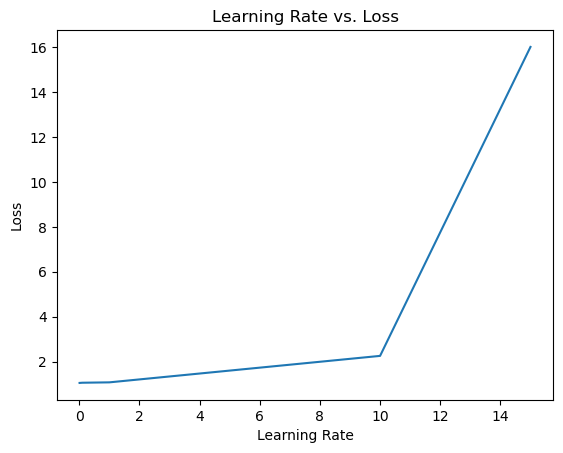

In [17]:
plt.plot([lr for lr, _ in loss_values], [loss for _, loss in loss_values])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs. Loss')
plt.savefig('Learning Rate')
plt.show()

# Building a simple neural network from scratch using TensorFlow:
Step 1: Define model structure with sigmoid function

In [29]:
#With imputation for nan values:
imputer = SimpleImputer(strategy='mean')
imputer.fit(X)
X_imputed = imputer.transform(X)


In [30]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    #tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for multinomial classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for multiclass classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
3/3 [==============================] - 0s 26ms/step - loss: 1.1911 - accuracy: 0.1630 - val_loss: 1.1179 - val_accuracy: 0.1818
Epoch 2/20
3/3 [==============================] - 0s 5ms/step - loss: 1.1585 - accuracy: 0.1848 - val_loss: 1.1036 - val_accuracy: 0.2727
Epoch 3/20
3/3 [==============================] - 0s 6ms/step - loss: 1.1349 - accuracy: 0.2065 - val_loss: 1.0894 - val_accuracy: 0.1818
Epoch 4/20
3/3 [==============================] - 0s 7ms/step - loss: 1.1131 - accuracy: 0.3261 - val_loss: 1.0765 - val_accuracy: 0.5455
Epoch 5/20
3/3 [==============================] - 0s 7ms/step - loss: 1.0939 - accuracy: 0.4239 - val_loss: 1.0643 - val_accuracy: 0.5455
Epoch 6/20
3/3 [==============================] - 0s 6ms/step - loss: 1.0752 - accuracy: 0.4674 - val_loss: 1.0534 - val_accuracy: 0.6364
Epoch 7/20
3/3 [==============================] - 0s 6ms/step - loss: 1.0600 - accuracy: 0.4565 - val_loss: 1.0439 - val_accuracy: 0.6364
Epoch 8/20
3/3 [=================

## Shap plot for feature importance

Using 103 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/26 [00:00<?, ?it/s]

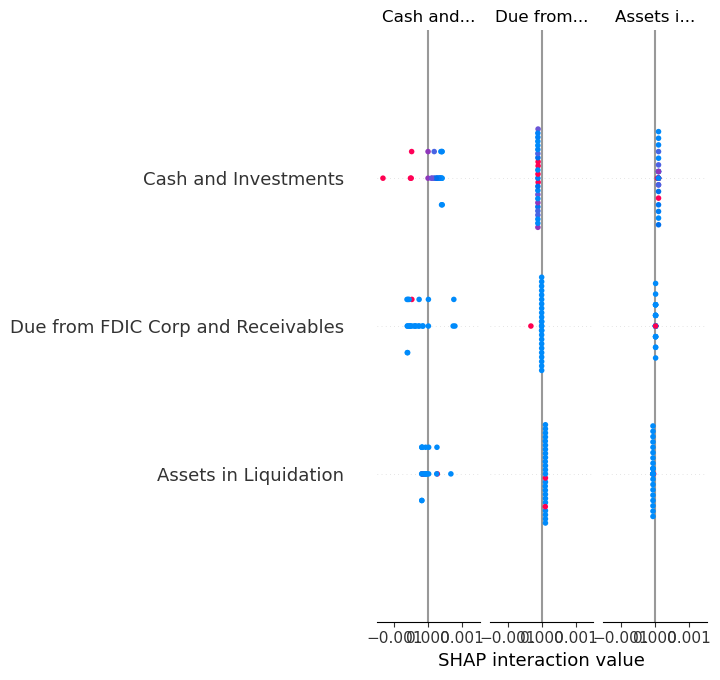

In [36]:
# Calculate SHAP values using KernelExplainer
explainer = shap.KernelExplainer(pipeline.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

# Create SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)

# Display the plot
plt.savefig('shap_plot.png')  # Save the plot as an image file
plt.show()


In [38]:
first_layer_weights = model.layers[0].get_weights()[0]  #get weights of the first layer

#get the coefficients (weights) for the second layer
second_layer_weights = model.layers[1].get_weights()[0]  # Get weights of the second layer

print("Coefficients of the first layer:")
print(first_layer_weights)

print("\nCoefficients of the second layer:")
print(second_layer_weights)

Coefficients of the first layer:
[[-0.02808171  0.29356784 -0.27370158 -0.15363583  0.0861003  -0.15394948
   0.0114564   0.3012672  -0.24315624 -0.30204844 -0.27983567  0.2441712
   0.19669257  0.16909842  0.216082   -0.32018375  0.00099106  0.2626428
   0.19633603 -0.20294914 -0.08232633 -0.05857548 -0.2594926  -0.11356979
   0.07629653  0.14401595 -0.01718623 -0.29939032  0.25595403  0.18036292
  -0.21559818  0.21304302 -0.0210849  -0.09630267  0.06179876  0.28134254
  -0.03456989  0.04138709  0.14367008 -0.18235621  0.01424793 -0.08582678
  -0.21714032 -0.16616477 -0.0833284   0.07516899  0.09760994 -0.16387488
   0.03098992  0.09062254  0.24193716  0.22362165 -0.18523213  0.2273224
  -0.2743435   0.16407381 -0.19265918 -0.22372441 -0.05502294 -0.16814001
   0.2823938   0.24160978  0.00346475 -0.16867515]
 [-0.05887005 -0.23548512 -0.26652643  0.08892898 -0.08245588  0.28052443
   0.10727044 -0.0709332  -0.22297248 -0.10376107 -0.07828765  0.1252301
   0.28982678 -0.02455055  0.106

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


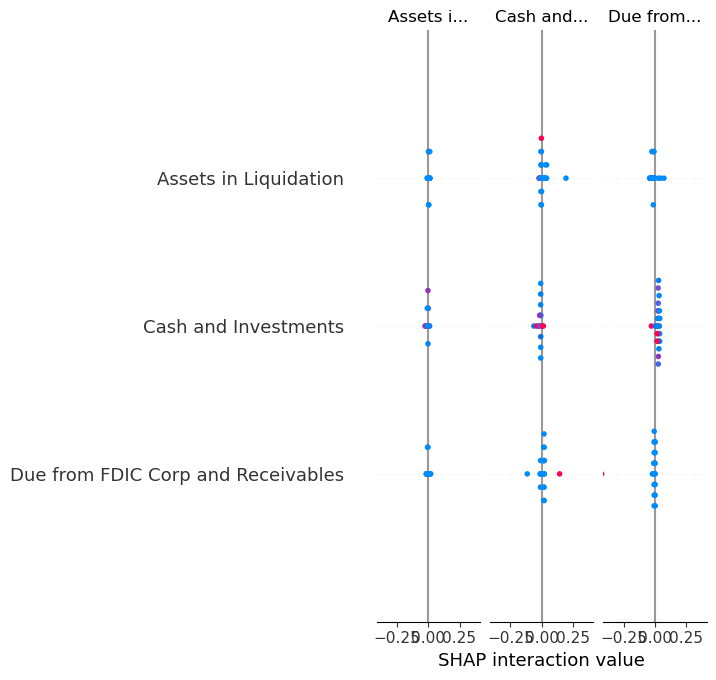

In [42]:
import shap

# Create an explainer object
explainer = shap.DeepExplainer(model, X_train_scaled)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)




In [60]:
import shap
shap.initjs()

# Define the explainer
explainer = shap.DeepExplainer(model, data=X_train_scaled[:100])

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_scaled[:1])

# Force plot
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_scaled[:1], feature_names=X.columns)


In [65]:
shap_values

array([[[-0.04118477, -0.05886545,  0.10005021],
        [ 0.00825096, -0.00103482, -0.00721613],
        [-0.00582181,  0.00546962,  0.00035219],
        [ 0.02144346, -0.00856995, -0.0128735 ],
        [-0.02569734,  0.01733852,  0.00835882],
        [ 0.00200905,  0.00145373, -0.00346279],
        [ 0.00520795,  0.00292724, -0.00813518],
        [ 0.00070472,  0.00586986, -0.00657457],
        [-0.00400588, -0.00112223,  0.00512811]]])

In [66]:
X_test_scaled

array([[ 0.89227002,  0.18133648, -0.22682133,  0.87074045, -0.35215604,
        -0.09299675, -0.12432979, -0.09460301,  0.09686919],
       [-0.10893783,  0.18133648, -0.22682133, -0.11829629, -0.35317182,
        -0.10774099, -0.12432979, -0.11571813, -0.20584041],
       [-0.03606929,  0.18133648, -0.22682133, -0.04631358, -0.35317182,
        -0.1083508 , -0.12432979, -0.11870564, -0.23503069],
       [-0.32436034,  0.18133648, -0.22682133, -0.33110004, -0.35249463,
        -0.10751636, -0.12432979, -0.11461765, -0.09268419],
       [-0.3001198 ,  0.18133648, -0.22682133, -0.30715418, -0.35215604,
        -0.10653171, -0.12432979, -0.10979375, -0.21241835],
       [-0.32485005,  0.18133648, -0.22682133, -0.3315838 , -0.35317182,
        -0.10868361, -0.12432979, -0.12033612, -0.2335078 ],
       [-0.28650592,  0.18133648, -0.22682133, -0.29370579, -0.35249463,
        -0.09861938, -0.12432979, -0.07103037,  0.15469062],
       [-0.20903412,  0.18133648, -0.22682133, -0.21717578, -0